<br>
<br>
# The Iris dataset
<br>

<br>
<br>
## ¿De qué trata este dataset?
<br>

El conjunto de datos (dataset) Iris fue introducido por Ronald Fisher en su paper de 1936, The use of multiple measurements in taxonomic problems (El uso de medidas múltiples en problemas taxonómicos). <a>https://archive.ics.uci.edu/ml/datasets/iris</a>

El dataset mide el largo y ancho de sépalos y pétalos de 3 tipos de flores: Iris setosa, Iris virginica e Iris versicolor.

<br>

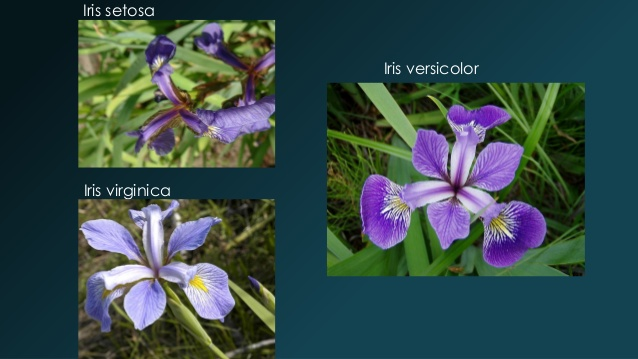

In [1]:
from IPython.display import Image
Image("species.jpg", width=650, height=650)

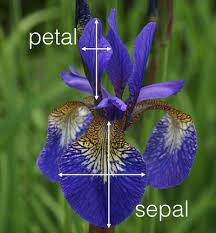

In [2]:
Image("measurements.jpg", width=450, height=450)

<br>
<br>
# ¿Cómo es la data?
<br>
Habitualmente la data se representa mediante tablas, donde cada columna es una característica de la data y cada fila es un registro. 
Cada característica es una medición distinta de las demas. Y digamos, por ejemplo, que cada registro representa los datos medidos en un tiempo determinado, por ejemplo, la primera fila a la 1:00pm, la segunda 1:10pm, la tercera 1:15pm, etc.
<br>
Pasos:
1. Importamos la librería pandas, la cual es una herramienta para el data análisis y trabaja con DataFrames, una estructura de datos eficiente para el trabajo con datos.
2. Leemos el dataset desde un archivo .csv.
3. Mostramos su forma
4. Mostramos las 10 primeras filas
<br>
<br>

In [3]:
import pandas as pd #1

iris = pd.read_csv("iris.csv") #2
print('Filas y columnas', iris.shape) #3
iris.head(10) #4



('Filas y columnas', (150, 5))


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


<br>
<br>
# Entendamos la data
<br>
<br>
Veamos sus características (columnas) : 	

<b>sepal_length,	sepal_width,	petal_length,	petal_width</b>

<br>
Usaremos distintos gráficos para analizar las distribución de cada una de las columnas.

<br>
### Histogramas
<br>
Los histogramas son gráficos en forma de barras, que muestran la frecuencia de un determinado intervalo de valores, es usado para variables continuas.
<br>

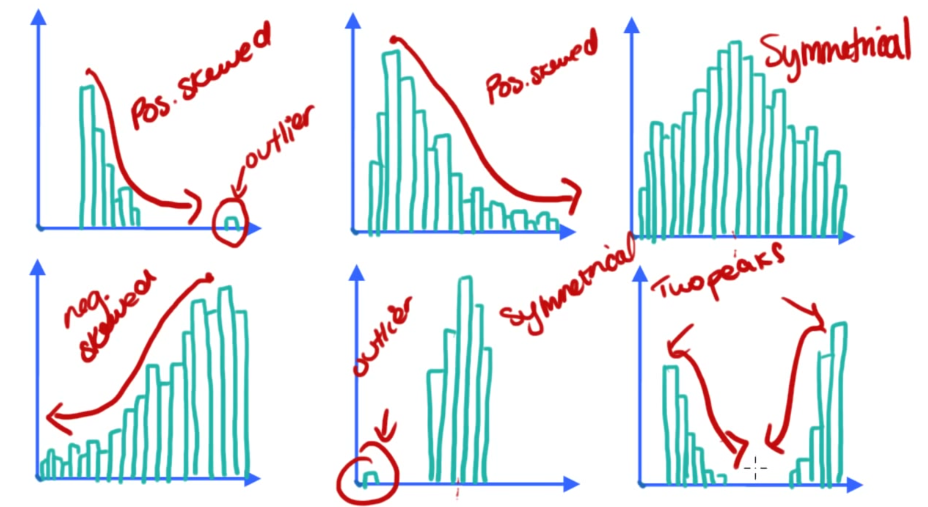

In [4]:
Image("explain_histograms.png", width=650, height=650)

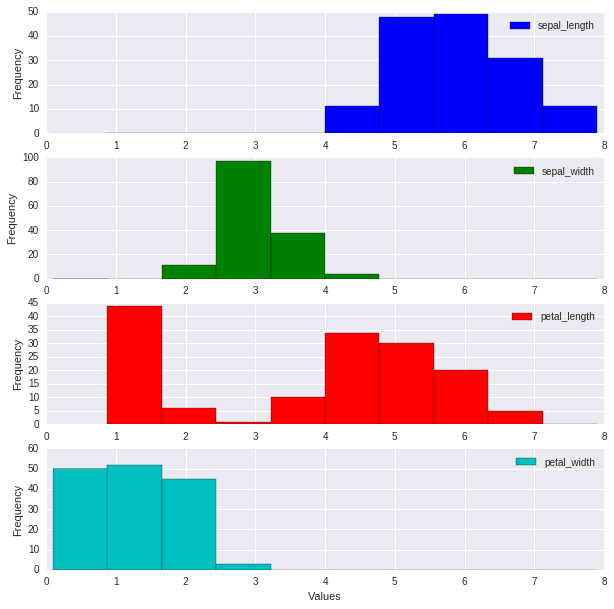

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

hist = iris.plot(kind='hist', figsize=(10, 10), subplots=True, sharex=False)
_ = plt.xlabel("Values")

<br>
<br>
## Gráfica de densidad de todas las variables
<br>

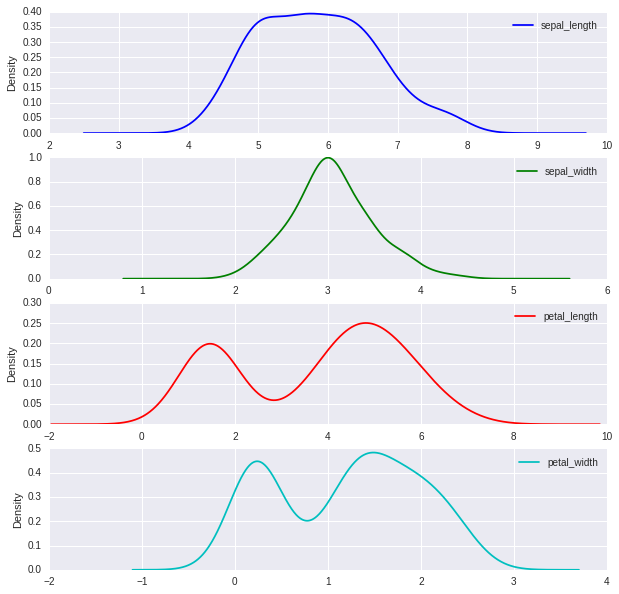

In [6]:
_ = iris.plot(kind='density', figsize=(10, 10), subplots=True, sharex=False)

<br>
### Diagrama de caja o boxplot
<br>
Sirven también para ver la distribución de los datos, pero su utilidad se enfoca en ver si hay valores atípicos o outliers, ver la dispersión de los valores y analizar los datos del histograma en una sola dimensión.
<br>
<br>

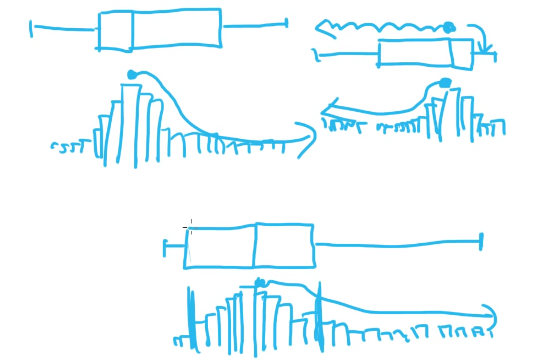

In [7]:
Image("explain_boxplots.png", width=550, height=550)

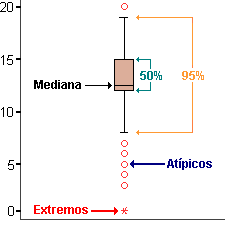

In [8]:
Image("explain_boxplots2.png", width=350, height=350)

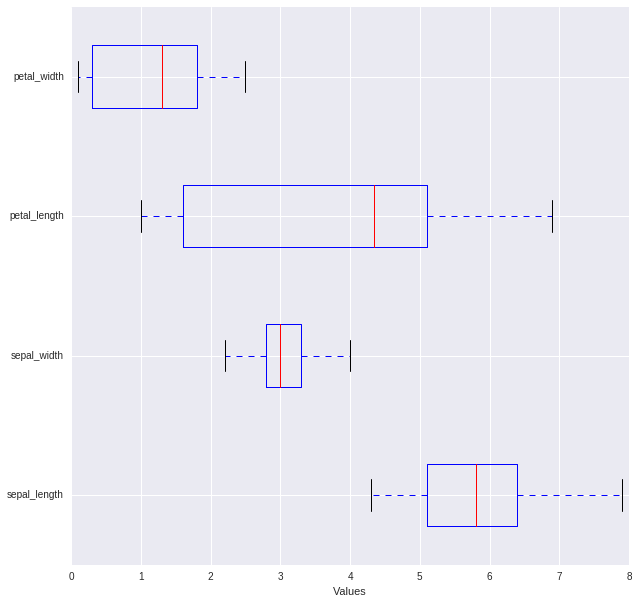

In [9]:
_ = iris.plot(kind='box',figsize=(10, 10), vert=False)
_ = plt.xlabel("Values")

<br>
## Analizando cada característica de cada especie

<br>
### sepal_length vs species
<br>

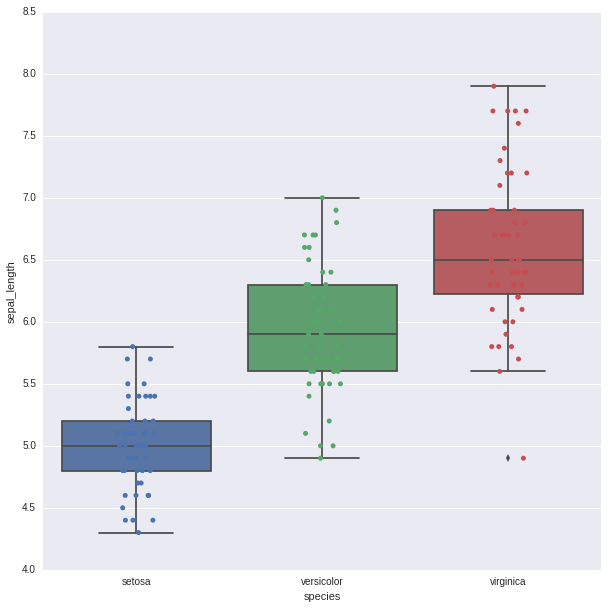

In [10]:
plt.figure(figsize=(10,10))
_ = sns.boxplot(x="species", y="sepal_length", data=iris)
_ = sns.stripplot(x="species", y="sepal_length", data=iris, jitter=True, edgecolor="gray", size=5)

<br>
### sepal_width vs species
<br>

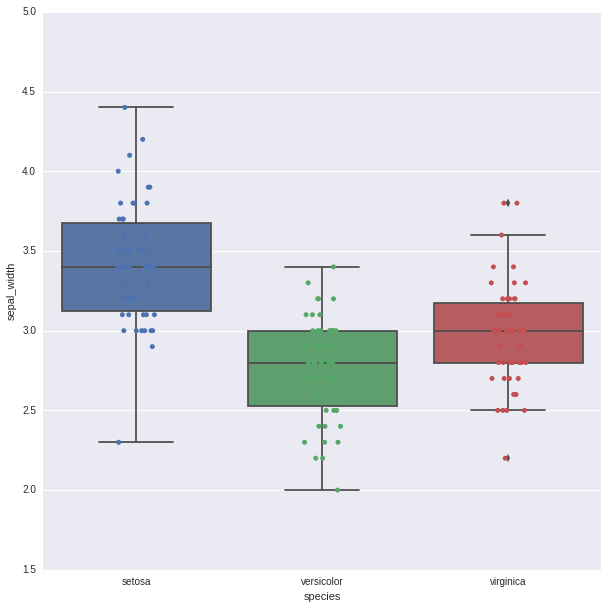

In [11]:
plt.figure(figsize=(10,10))
_ = sns.boxplot(x="species", y="sepal_width", data=iris)
_ = sns.stripplot(x="species", y="sepal_width", data=iris, jitter=True, edgecolor="gray")

<br>
###  sepal_length vs species
<br>

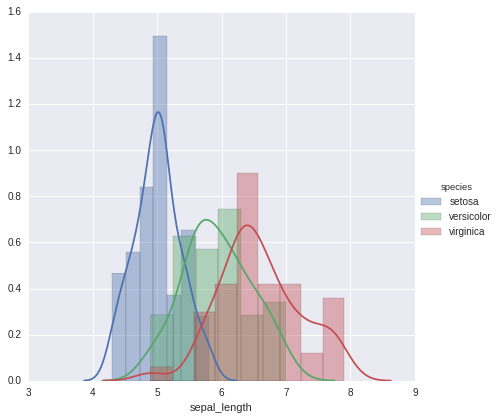

In [12]:
_ = sns.FacetGrid(iris, hue="species", size=6) \
   .map(sns.distplot, "sepal_length") \
   .add_legend()

<br>
### sepal_width vs species
<br>

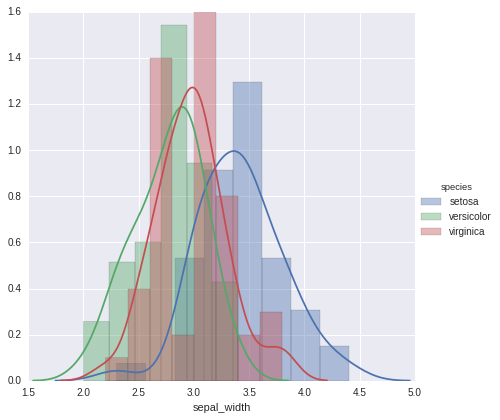

In [13]:
_ = sns.FacetGrid(iris, hue="species", size=6) \
   .map(sns.distplot, "sepal_width") \
   .add_legend()

<br>
<br>
## Analizando patrones
<br>
Con los siguientes gráficos podemos observar cúmulos o grupos definidos, donde cada grupo es una clase. Por tanto, el problema trata de clasificación, especificamente, clasificación múltiple supervisada.

<br>
## Scatter plot
<br>

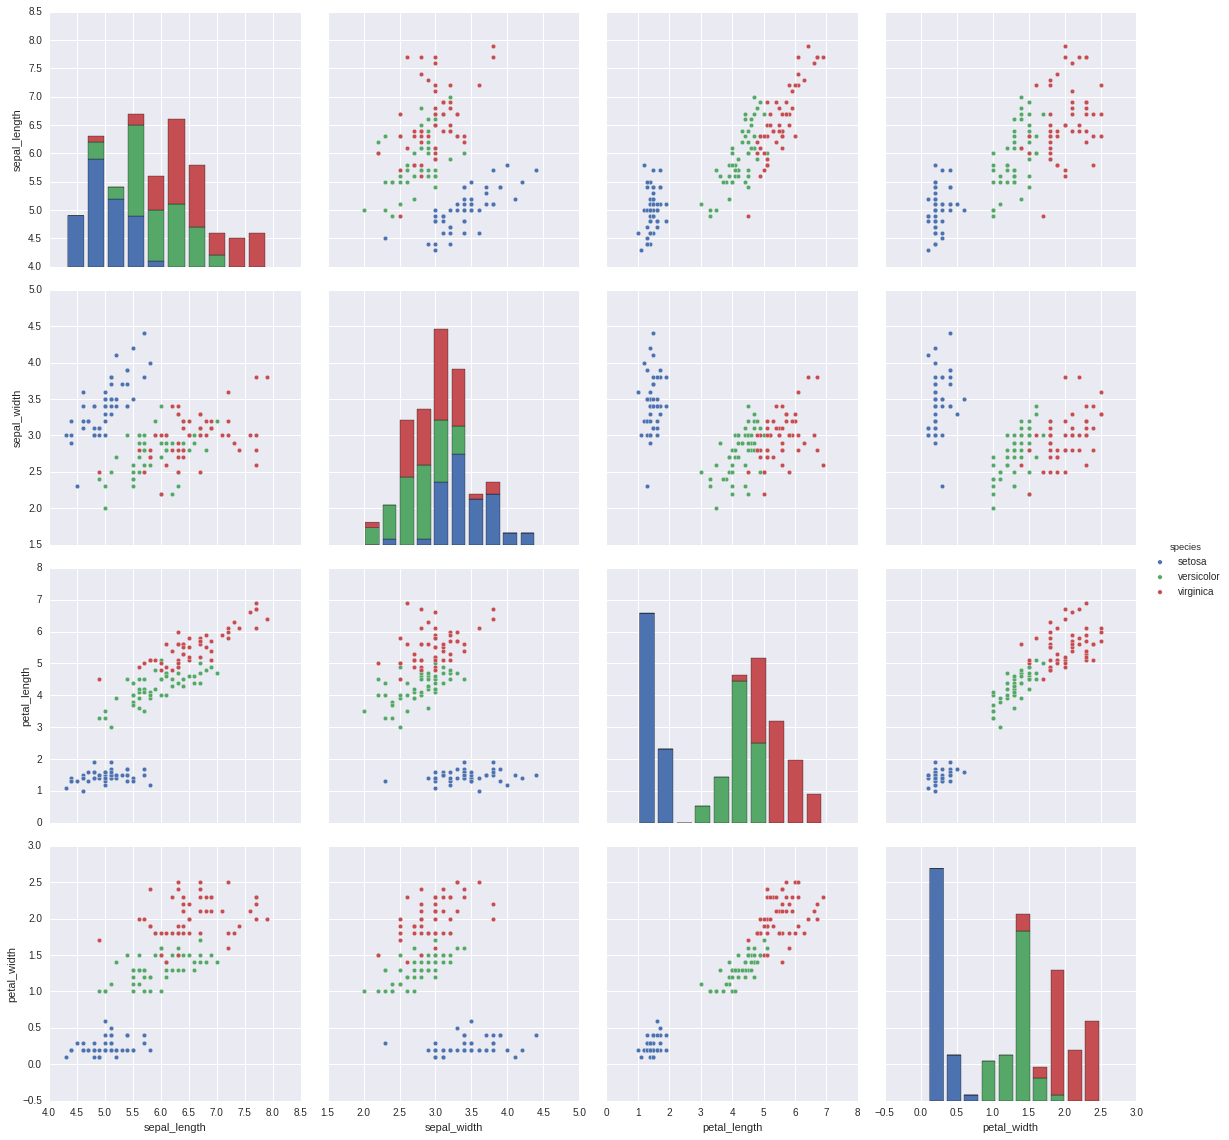

In [14]:
_ = sns.pairplot(iris, hue='species', size=4)

## Andrews curve
<br>
<br>
Es una manera de expresar un dataset, de dimensión alta, en grupos fácilmente identificables.
<br>
<br>

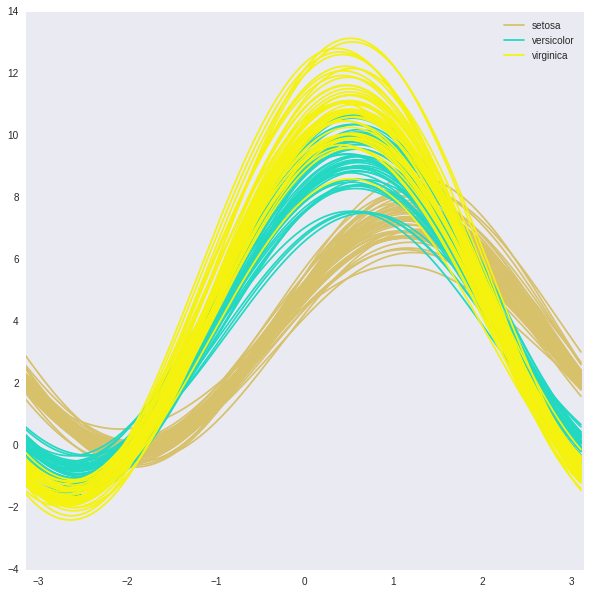

In [15]:
from pandas.tools.plotting import andrews_curves
plt.figure(figsize=(10,10))
_ = andrews_curves(iris, "species")

<br>
## Kdeplot
<br>
<br>
Resalta con mayor claridad los clusters o clases encontradas.
<br>
<br>

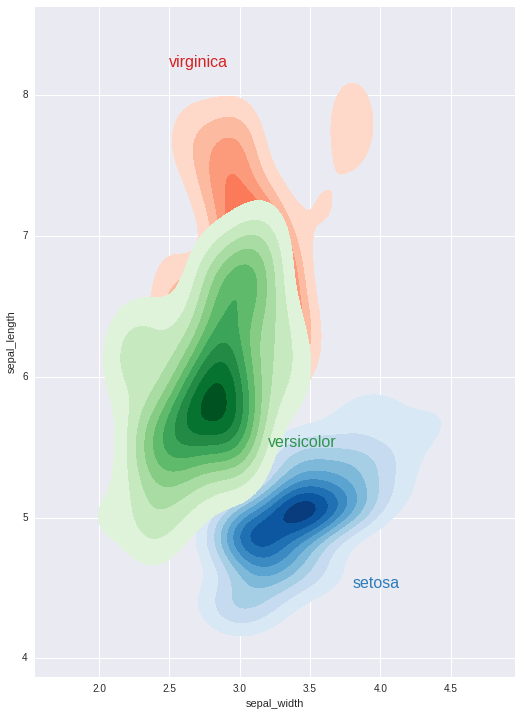

In [16]:
setosa = iris.query("species == 'setosa'")
virginica = iris.query("species == 'virginica'")
versicolor = iris.query("species == 'versicolor'")


f, ax = plt.subplots(figsize=(12, 12))
ax.set_aspect("equal")


ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(versicolor.sepal_width, versicolor.sepal_length,
                 cmap="Greens", shade=True, shade_lowest=False)


blue = sns.color_palette("Blues")[-2]
red = sns.color_palette("Reds")[-2]
green = sns.color_palette("Greens")[-2]
_ = ax.text(2.5, 8.2, "virginica", size=16, color=red)
_ = ax.text(3.8, 4.5, "setosa", size=16, color=blue)
_ = ax.text(3.2, 5.5, "versicolor", size=16, color=green)

<br>
<br>
## Matriz de correlaciones
<br>

Muestra la correlación (directa o inversa) que existen entre las características o columnas, excepto la variable de respuesta. Esto sirve para ver si es posible resumir columnas (reducir), aumentar o combinarlas con el objetivo de reducir el tiempo de entrenamiento, eliminar redundancia de datos y mejorar el performance del modelo.
<br>
<br>

CPU times: user 512 ms, sys: 4 ms, total: 516 ms
Wall time: 521 ms


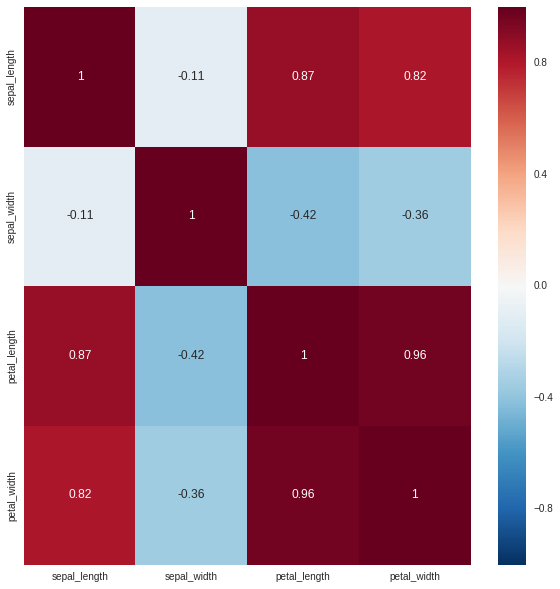

In [17]:
%%time
from collections import OrderedDict

class_name = 'species'
features = iris.ix[:, iris.columns != class_name]
dictFeatures = OrderedDict(features)

features = dictFeatures.keys()
features.append('species')

def plot_heatmap(df):
    fig, axes = plt.subplots(figsize=(10,10))
    _ = sns.heatmap(df, annot=True)

#     plt.show()
#     plt.close()
    
plot_heatmap(iris[features].corr(method='pearson'))

<br>
<br>
### Vamos más en detalle, analicemos la variable 'species'
<br>

Verificamos la cantidad de valores NaN : Not a Number
<br>
<br>

In [18]:
from __future__ import division

print 'filas sin valores nan: ', len(iris.species.dropna())
print 'filas totales: ', len(iris.species)

filas sin valores nan:  150
filas totales:  150


In [19]:
print(iris.groupby('species').size())

species
setosa        50
versicolor    50
virginica     50
dtype: int64


# Selección de características o Feature Selection
<br>
<br>
Feature Selection es un proceso donde se selecciona automáticamente las características que contribuyen en mayor medida a la variable a predecir.

## Hay cuatro tipos importantes:

1. Univariate Selection.
2. Recursive Feature Elimination.
3. Principle Component Analysis.
4. Feature Importance

## Beneficios

Reduces Overfitting: El modelo funcionará bien con data nunca vista.

Improves Accuracy: Datos menos engañosos significa una mejora en la exactitud del modelo.

Reduces Training Time: Menos data significa que los algoritmos entrenarán más rapido.

<br>
<br>
## Univariate Selection
<br>
<br>
Selecciona las columnas que tengan una relación fuerte con la variable a predecir.
<br>
<br>

Para regresión: f_regression

Para classificación: chi2 or f_classif
<br>
<br>

En este caso de clasificación, se realiza el test chi square, el cual mide la dependencia entre variables estocásticas, este test remueve las características más probables a ser independientes, por lo tanto, irrelevantes para la clasificación.
<br>
<br>

In [20]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

class_name = 'species'
X = iris.ix[:, iris.columns != class_name]
y = iris[class_name]


test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

print fit.scores_

print

print X.head()


[  10.81782088    3.59449902  116.16984746   67.24482759]

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


<br>
<br>
## Feature Importance
<br>
<br>
Los Bagged decision trees como lo son Random Forest y Extra Trees pueden ser usados para estimar la importancia de caracteristicas. Asi como tambien, el algoritmo Gradient Boosting.
<br>
<br>

In [21]:
from sklearn.model_selection import cross_val_score


def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    alg.fit(dtrain[predictors], dtrain['species'])
        
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances', figsize=(14.,7.))
        plt.ylabel('Feature Importance Score')
        plt.show()
        plt.close()
    
    return feat_imp

<br>
<br>
### Probamos primero con ExtraTreesClassifier
<br>
<br>

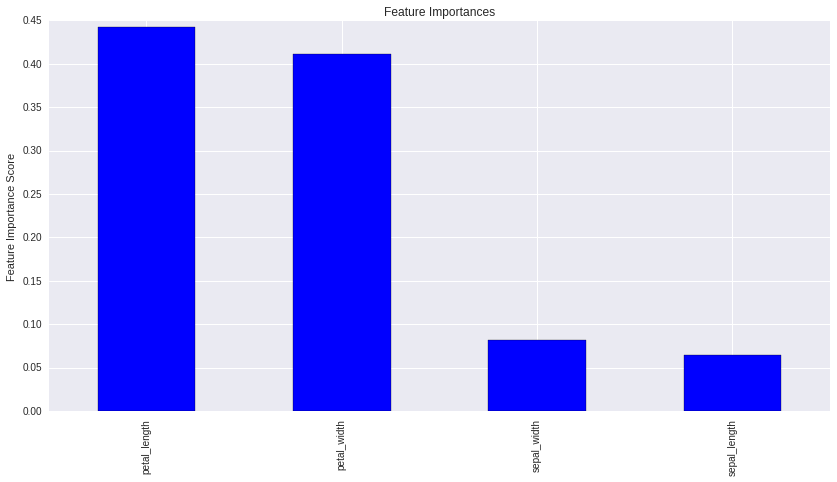

petal_length    0.442659
petal_width     0.411437
sepal_width     0.081604
sepal_length    0.064301
dtype: float64
CPU times: user 452 ms, sys: 24 ms, total: 476 ms
Wall time: 467 ms


In [22]:
%%time
from sklearn.ensemble import ExtraTreesClassifier

target = 'species'
predictors = [x for x in iris if x not in [target]]
model = ExtraTreesClassifier(random_state=10)
fi = modelfit(model, iris, predictors)
print fi.head(6)

<br>
<br>
### Probamos ahora con GradientBoostingClassifier
<br>
<br>

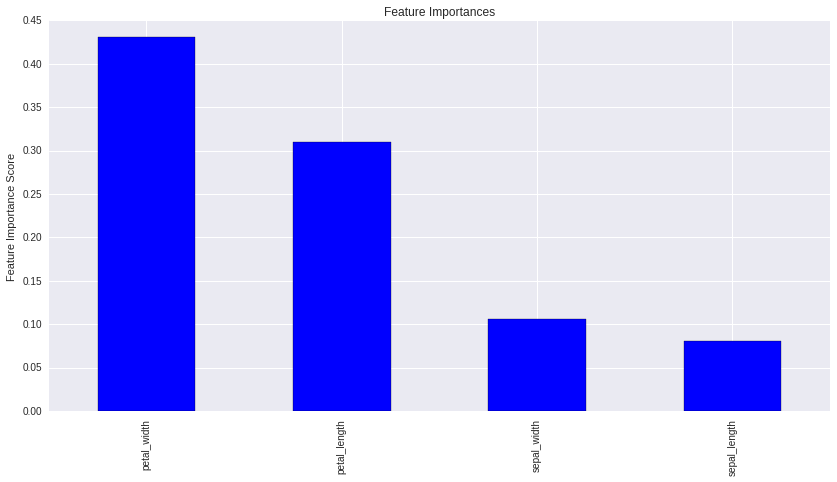

petal_width     0.430816
petal_length    0.310302
sepal_width     0.105442
sepal_length    0.080107
dtype: float64
CPU times: user 660 ms, sys: 4 ms, total: 664 ms
Wall time: 665 ms


In [23]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

target = 'species'
predictors = [x for x in iris if x not in [target]]
model = GradientBoostingClassifier(random_state=10)
fi = modelfit(model, iris, predictors)
print fi.head(6)



<br>
<br>
# Cómo dividir el dataset  para mejorar el rendimiento de un algoritmo de Machine Learning
<br>
<br>
En este apartado se aprenderá cómo evaluar un algoritmo, mediante diferentes técnicas de estimacion:

<ul>
<li> Train y Test Sets
<li> K-fold Cross Validation
<li> Leave One Out Cross Validation
<li> Repeated Random Test-Train Splits
</ul>
<br>
<br>

<br>
<br>
## Split into Train and Test Sets
<br>
<br>
Esta técnica es usada para grandes datasets, donde el entrenamiento tenga un coste alto 
en recursos y tiempo. Por contra, esta técnica puede tener inducir a una alta varianza, es decir, las diferencias entre la data de entrenamiento (training) y de prueba (testing) pueden ser significativas a la hora de estimar la precisión del modelo.

Lo más comun es dividir la data en: 67% para el training y 33% para el testing.
<br>
<br>

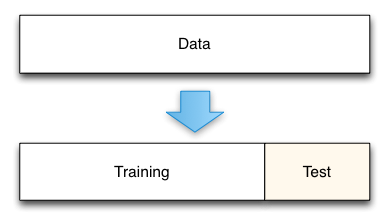

In [24]:
Image("split_train_test.png", width=450, height=450)

In [25]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y,
                                                                    test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)

print("Accuracy: %.3f%%") % (result*100.0)

Accuracy: 90.000%
CPU times: user 20 ms, sys: 4 ms, total: 24 ms
Wall time: 24.5 ms


El seed o semilla es fijo para tener el mismo conjunto de datos en todo el proceso, de tal manera, que cuando se haga pruebas usando otro algoritmo, se pueda usar la misma dataset.

<br>
<br>
## K-fold Cross Validation
<br>
<br>
Esta técnica divide la data en k conjuntos, de tal manera que se entrena con los <i>k-1</i> folds(pliegues) y se testea con el sobrante, luego se hace el mismo procedimiento escogiendo otros <i>k-1</i> . Este procedimiento se realiza hasta que cada fold es testeado. Luego de tener las <i>k</i>  puntuaciones de rendimiento se puede resumir usando la media o la desviación estandar. Este resultado es más fiable en el rendimiento del algoritmo cuando se presenta una nueva data. Es necesario que la elección de <i>k</i> permita que las muestras sean lo suficientemente grande, lo valores más comúnes para <i>k</i> son 3, 5, 10.
<br>
<br>

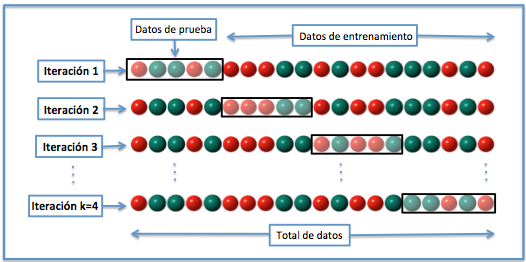

In [26]:
Image("K-fold_cross_validation.jpg", width=650, height=650)

In [27]:
%%time
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
num_instances = len(X)
seed = 7

kfold = KFold(n=num_instances, n_folds=num_folds,
                              random_state=seed)
model = LogisticRegression()
results = cross_val_score(model, X, y, cv=kfold)

#model.fit(X_train, Y_train)
#result = model.score(X_test, Y_test)
print("Accuracy: mean : %.3f%%, SD : %.3f%%") % (results.mean()*100.0, results.std()*100.0)

Accuracy: mean : 88.000%, SD : 14.847%
CPU times: user 76 ms, sys: 4 ms, total: 80 ms
Wall time: 79.9 ms


/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<br>
<br>
## Leave One Out Cross Validation
<br>
<br>
Esta técnica trabaja con <i>k</i> = len(X), con el objetivo de estimar con una mayor precisión el modelo para datos nuevos. Como desventaja, es computacionalmente costoso que la técnica cross validation y su varianza es alta.
<br>
<br>

In [28]:
%%time
from sklearn.cross_validation import LeaveOneOut

num_instances = len(X)
loocv = LeaveOneOut(n=num_instances)

model = LogisticRegression()
results = cross_val_score(model, X, y, cv=loocv)

#model.fit(X_train, Y_train)
#result = model.score(X_test, Y_test)
print("Accuracy: mean : %.3f%%, SD : %.3f%%") % (results.mean()*100.0, results.std()*100.0)

Accuracy: mean : 95.333%, SD : 21.092%
CPU times: user 1.07 s, sys: 0 ns, total: 1.07 s
Wall time: 1.07 s


<br>
<br>
# Métricas usadas al evaluar un modelo en Machine Learning 
<br>
<br>
En esta parte se verá las diferentes métricas para evaluar la calidad de las predicciones de un modelo de ML. Para la evaluación se usará un k=10 en todas las datasets.
<br>

<br>
### Clasification:

<ul>
    <li> Dataset: Iris.
    <li> Algorithm : Logistic Regression.
    <li> Test Harness: 10-fold Cross validation.
</ul>

<br>
Otro ejemplo podría ser:
<br>

### Regression:

<ul>
    <li> Dataset: Boston House Price.
    <li> Algorithm : Linear Regression.
    <li> Test Harness: 10-fold Cross validation.
</ul>





<br>
# Clasification Metrics
<br>
<br>
<ul>
    <li> Classification Accuracy.
    <li> Logarithmic Loss
    <li> Area Under ROC Curve.
    <li> Confusion Matrix.
    <li> Classification Report.
</ul>

<br>
## Clasification Accuracy
<br>
<br>
$$ \text{metric} = \frac{\text{# correct predictions}}{\text{# total predictions}}$$

<br>
<br>
Es recomendable cuando solo se tiene un número igual de observaciones de cada clase.

In [29]:
num_folds = 10
num_instances = len(X)
num_samples = 10
seed = 7

kfold = KFold(n=num_instances, n_folds=num_folds,
                              random_state=seed)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, X, y, 
                                           cv=kfold, scoring=scoring)

print("Accuracy: mean : %.3f (%.3f)") % (results.mean(), results.std())


Accuracy: mean : 0.880 (0.148)


<br>
<br>
## Confusion Matrix
<br>
<br>

Es una métrica usada para clases que no están balanceadas, por ejemplo, en el dataset Iris tenemos 50 filas de cada especie las cuales se dice que esta balanceadas, pero en muchos otros problemas las clases estan desbalanceadas, por tanto, esta métrica permite saber específicamente cómo se comporta el modelo clase por clase.<br>
<br>

### Clave predecida vs Clase real
<br>

('Cantidad de valores de prueba: ', 50)


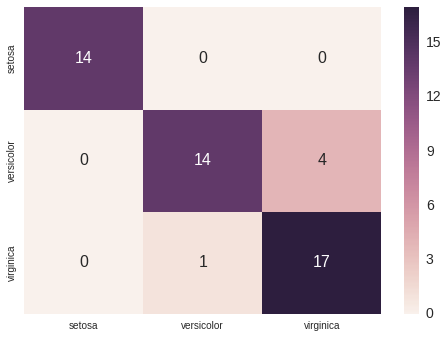

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model.fit(X_train, Y_train)
predictions = model.predict(X_test)
cm = confusion_matrix(Y_test, predictions)

print('Cantidad de valores de prueba: ', len(Y_test))

df_cm = pd.DataFrame(cm, y.unique(),
                  y.unique())

ax = plt.axes()
_ = sns.set(font_scale=1.4)
_ = sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, ax=ax)


<br>
<br>
# Modelando la data usando Pipelines
<br>
<br>
El Pipeline es una manera de juntar transformadores (p.e, Scaler, SelectKbest) y estimadores (ExtraTrees, Logistic Regression) en un solo flujo, de tal manera que cada eslabon del pipeline se ejecute secuencialmente hasta lograr el modelo predictivo. Por ejemplo, se puede poner en un flujo los Transformers: Scale, Normalization, etc, y en otro pipeline, transformers para features selections: univariate, pca, etc. y en otro pipeline poner estimadores: PCA, k-means, etc. Entonces con la función FeatureUnion, podemos unir esos tres pipelines para crear un pipeline total, que realiza todos esos pasos como uno solo. Esto ayuda a evitar la perdida de data y la legibilidad.
<br>
<br>


In [31]:
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC

transformers = []
transformers.append(( 'standardize' , StandardScaler()))
# # estimators.append(( 'normalizer' , Normalizer()))
# estimators.append(( 'lda' , LinearDiscriminantAnalysis()))
transf_union = FeatureUnion(transformers)
# model = Pipeline(estimators)

# create feature union
features = []
features.append(('transf_union', transf_union))
features.append(( 'pca', PCA(n_components=3)))
features.append(( 'select_best' , SelectKBest(k=3)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(( 'feature_union' , feature_union))
estimators.append(( 'logistic' , SVC()))
# estimators.append(('svm' , SVC(kernel="linear")))
model = Pipeline(estimators)

# evaluate pipeline
num_folds = 10
num_instances = len(X)
seed = 7
kfold = KFold(n=num_instances, n_folds=num_folds, random_state=seed)
results = cross_val_score(model, X, y, cv=kfold)
print('Score:', results.mean())
# predictions = cross_val_predict(model, X, y)

('Score:', 0.95999999999999996)


<br>
<br>
## Valor Real vs Valor Predecido
<br>
<br>

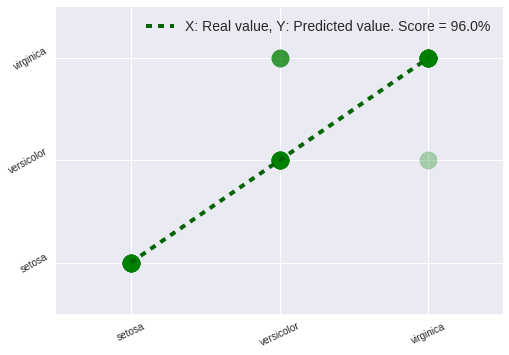

In [32]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
Y_test = encoder.fit_transform(Y_test)
predictions = encoder.fit_transform(predictions)

#Ploteando
y_test = Y_test
y_test = list(y_test)
predictions = list(predictions)

plt.scatter(y_test, predictions, alpha=0.3, color='green', s=300)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', color='darkgreen',lw=4, 
         label= 'X: Real value, Y: Predicted value. Score = '+str(results.mean()*100)+'%')

plt.xticks(np.arange(0,3), tuple(y.unique()), rotation=25,
                              fontsize = 10)
plt.yticks(np.arange(0,3), tuple(y.unique()), rotation=29,
                              fontsize = 10)
plt.legend(loc='best')
plt.grid(True)

# Conclusiones

1. Debemos primero preguntarnos, qué problema queremos resolver.
2. Luego plotear la data cruda y ver relaciones y patrones, para determinar
   si el problema puede ser tratado como clasificación o regresión.
3. Una vez teniendo claro las relaciones entre las variables, pasamos 
   a limpiar la data de ruido, anomalías, etc.
4. Buscamos las columnas que mayor contribuyan al modelo, tanto en 
   tiempo de entrenamiento y bondad (score).
5. Buscar la mejor manera de dividir los datos, no siempre un método 
   va a funcionar para todos los casos.
6. Al crear pipelines de todos los pasos, se reduce la perdida de datos, 
   mejora la precisión y además se mantiene una estructura modular y 
   flexible para la ejecución del cross validación y 
   posteriormente para el análisis de hiperparámetros.
7. Escoger las adecuadas métricas, roc_auc, accuracy, confusion matrix, etc.
8. Para aplicaciones de producción, los pasos anteriores se realizan
   muchas veces, siguiendo un ciclo, de tal manera que se pueda pulir 
   todos los detalles del modelo, haciendo confiable, robusto y eficiente.
9. No todo se rige al modelo que tenga mayor score, muchas 
   veces se requiere de un modelo explicado, que puede tener menos score 
   pero puede explicar paso a paso sus salidas, como los árboles de 
   decisión.
10. Por último, el data science es un arte, y como tal, depende mucho
    de la creatividad del analista para obtener una materia prima muy fina 
    para el posterior entrenamiento. Más limpia y significante es la data, 
    mejor será tu modelo.